# Newspaper NLP

The Natural Language Toolkit (NLTK) is a Python library for handling natural language processing (NLP).

This project aims to evaluate the headlines of the New York newspaper between January and July 2020 and see how the words like COVID and Virus have taken on relevance over these months.

I will cover the following topics in this project:

* Installing NLTK and its modules
* Text preprocessing and exploratory analysis
* Top words mentioned


The project will contain:

*  Data Viz that will show how the word COVID has gained relevance, as well as other words that appeared in a ranking of 20.
* Data Viz  showing the ranking of words over those months. Use tableau to make the chart animated.
 

## Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [2]:
# Load the data

months_df = pd.read_csv('months.csv', parse_dates=True, index_col='date')
months_df.head()

headline doc_type  \
date                                                                     
2020-01-01  2020 Golden Globes Predictions: Which Movies W...  article   
2020-01-01                             ‘It’s Green and Slimy’  article   
2020-01-01                        Poem: The Far Norway Maples  article   
2020-01-01                              New Year, New Recipes  article   
2020-01-01  Netanyahu Seeks Immunity From Israeli Corrupti...  article   

           material_type  section  \
date                                
2020-01-01          News      NaN   
2020-01-01          News      NaN   
2020-01-01          News      NaN   
2020-01-01          News      NaN   
2020-01-01          News      NaN   

                                                     keywords  
date                                                           
2020-01-01               ['Movies', 'Golden Globes (Awards)']  
2020-01-01                              ['Crossword Puzzles']  
2020-01-01                               ['Poetry and Poets']  
2020-01-01                          ['Cooking and Cookbooks']  
2020-01-01  ['Corruption (Institutional)', 'Immunity from ...

In [3]:
months_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33949 entries, 2020-01-01 to 2020-08-01
Data columns (total 5 columns):
headline         33949 non-null object
doc_type         33949 non-null object
material_type    33949 non-null object
section          0 non-null float64
keywords         33949 non-null object
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [4]:
months_df.index

DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01',
               ...
               '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31',
               '2020-08-01', '2020-08-01', '2020-08-01', '2020-08-01',
               '2020-08-01', '2020-08-01'],
              dtype='datetime64[ns]', name='date', length=33949, freq=None)

In [5]:

months_df.shape

(33949, 5)

Drop the 'section' column from the DataFrame. 

In [6]:
months_df = months_df.drop(['section'], axis=1)
months_df.head()

headline doc_type  \
date                                                                     
2020-01-01  2020 Golden Globes Predictions: Which Movies W...  article   
2020-01-01                             ‘It’s Green and Slimy’  article   
2020-01-01                        Poem: The Far Norway Maples  article   
2020-01-01                              New Year, New Recipes  article   
2020-01-01  Netanyahu Seeks Immunity From Israeli Corrupti...  article   

           material_type                                           keywords  
date                                                                         
2020-01-01          News               ['Movies', 'Golden Globes (Awards)']  
2020-01-01          News                              ['Crossword Puzzles']  
2020-01-01          News                               ['Poetry and Poets']  
2020-01-01          News                          ['Cooking and Cookbooks']  
2020-01-01          News  ['Corruption (Institutional)', 'Immunity from ...

## Installing NLTK modules

In [7]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Text Preprocessing and Exploratory Analysis

### Splitting the Data Frame by Months

In [8]:
jan_df = months_df["2020-01-01":"2020-01-31"]
jan_df

headline doc_type  \
date                                                                     
2020-01-01  2020 Golden Globes Predictions: Which Movies W...  article   
2020-01-01                             ‘It’s Green and Slimy’  article   
2020-01-01                        Poem: The Far Norway Maples  article   
2020-01-01                              New Year, New Recipes  article   
2020-01-01  Netanyahu Seeks Immunity From Israeli Corrupti...  article   
...                                                       ...      ...   
2020-01-31  New York Is Urged to Consider Surge Pricing fo...  article   
2020-01-31  Battle Lines Quickly Form Over Radical Propert...  article   
2020-01-31  Late Night Dissects Alan Dershowitz’s Unimpeac...  article   
2020-01-31  Amid Trump’s Trial, Pompeo Visited Ukraine. He...  article   
2020-01-31  No More Doggies in the Window? N.Y. May Ban Re...  article   

           material_type                                           keywords  
date                                                                         
2020-01-01          News               ['Movies', 'Golden Globes (Awards)']  
2020-01-01          News                              ['Crossword Puzzles']  
2020-01-01          News                               ['Poetry and Poets']  
2020-01-01          News                          ['Cooking and Cookbooks']  
2020-01-01          News  ['Corruption (Institutional)', 'Immunity from ...  
...                  ...                                                ...  
2020-01-31          News  ['Taxicabs and Taxicab Drivers', 'Car Services...  
2020-01-31          News  ['Property Taxes', 'Real Estate and Housing (R...  
2020-01-31          News                                                 []  
2020-01-31          News  ['Trump-Ukraine Whistle-blower Complaint and I...  
2020-01-31          News  ['Animal Abuse, Rights and Welfare', 'Law and ...  

[4849 rows x 4 columns]

In [9]:
feb_df = months_df["2020-02-01":"2020-02-29"]


In [10]:
mar_df = months_df["2020-03-01":"2020-03-31"]


In [11]:

apr_df = months_df["2020-04-01":"2020-04-30"]


In [12]:
may_df = months_df["2020-05-01":"2020-05-31"]


In [13]:
jun_df = months_df["2020-06-01":"2020-06-30"]


In [14]:
jul_df = months_df["2020-07-01":"2020-07-31"]


## Exploratory Data Analysis (EDA)

I need analyse and clean all the headline.

First, I will join each headline in one string.
Then the string will be  splitted into a list where each word is a list item.


In [15]:
# join the strings of every row
sentences_jan = jan_df['headline'].str.cat(sep = '')
sentences_jan

"2020 Golden Globes Predictions: Which Movies Will Win?‘It’s Green and Slimy’Poem: The Far Norway MaplesNew Year, New RecipesNetanyahu Seeks Immunity From Israeli Corruption ChargesPika-Who? How Pokémon Go Confused the Canadian MilitaryPompeo Cancels Ukraine Trip Amid Protests at Embassy in IraqHe’s Not ‘Mayor Pete’ Anymore: Buttigieg’s Successor Is Sworn InHe’s Not ‘Mayor Pete’ Anymore: Buttigieg’s Successor Is Sworn InPompeo Cancels Ukraine Trip Amid Protests at Embassy in IraqHouse Hunting in Spain: A Historic Estate For Under $2 MillionNew Cruise Ships to Set Sail for AntarcticaDon’t Drink and Drive, Republican Leader Said. Then He Was Arrested.The Lesson of an Albanian Earthquake: The Balkans Aren’t Ready for the Big OneHouse Hunting in Spain: A Historic Estate For Under $2 MillionJudge John Hodgman on Uncle Money BagsThese Armenian Flatbreads Stuffed With Greens Are the Perfect SnackThe Lesson of an Albanian Earthquake: The Balkans Aren’t Ready for the Big OneDavid Stern Saw Wher

In [16]:
sentences_jan = sentences_jan.lower()
sentences_jan

"2020 golden globes predictions: which movies will win?‘it’s green and slimy’poem: the far norway maplesnew year, new recipesnetanyahu seeks immunity from israeli corruption chargespika-who? how pokémon go confused the canadian militarypompeo cancels ukraine trip amid protests at embassy in iraqhe’s not ‘mayor pete’ anymore: buttigieg’s successor is sworn inhe’s not ‘mayor pete’ anymore: buttigieg’s successor is sworn inpompeo cancels ukraine trip amid protests at embassy in iraqhouse hunting in spain: a historic estate for under $2 millionnew cruise ships to set sail for antarcticadon’t drink and drive, republican leader said. then he was arrested.the lesson of an albanian earthquake: the balkans aren’t ready for the big onehouse hunting in spain: a historic estate for under $2 millionjudge john hodgman on uncle money bagsthese armenian flatbreads stuffed with greens are the perfect snackthe lesson of an albanian earthquake: the balkans aren’t ready for the big onedavid stern saw wher

In [17]:
print(len(sentences_jan))

266620


### Tokenization

In [18]:
#sentences_jan = jan_df['headline'].tolist() # converteu todos os headlines em uma lista
#sentences_jan

Split() method of Python strings is the most basic tokenizer, that uses white space as delimiter.


In [19]:
#Split a string into a list where each word is a list item
#sentences_jan = sentences_jan.split()
#sentences_jan

In [20]:
from nltk.tokenize import word_tokenize

tok_jan = word_tokenize(sentences_jan)
tok_jan

['2020',
 'golden',
 'globes',
 'predictions',
 ':',
 'which',
 'movies',
 'will',
 'win',
 '?',
 '‘',
 'it',
 '’',
 's',
 'green',
 'and',
 'slimy',
 '’',
 'poem',
 ':',
 'the',
 'far',
 'norway',
 'maplesnew',
 'year',
 ',',
 'new',
 'recipesnetanyahu',
 'seeks',
 'immunity',
 'from',
 'israeli',
 'corruption',
 'chargespika-who',
 '?',
 'how',
 'pokémon',
 'go',
 'confused',
 'the',
 'canadian',
 'militarypompeo',
 'cancels',
 'ukraine',
 'trip',
 'amid',
 'protests',
 'at',
 'embassy',
 'in',
 'iraqhe',
 '’',
 's',
 'not',
 '‘',
 'mayor',
 'pete',
 '’',
 'anymore',
 ':',
 'buttigieg',
 '’',
 's',
 'successor',
 'is',
 'sworn',
 'inhe',
 '’',
 's',
 'not',
 '‘',
 'mayor',
 'pete',
 '’',
 'anymore',
 ':',
 'buttigieg',
 '’',
 's',
 'successor',
 'is',
 'sworn',
 'inpompeo',
 'cancels',
 'ukraine',
 'trip',
 'amid',
 'protests',
 'at',
 'embassy',
 'in',
 'iraqhouse',
 'hunting',
 'in',
 'spain',
 ':',
 'a',
 'historic',
 'estate',
 'for',
 'under',
 '$',
 '2',
 'millionnew',
 'cruise

## Remove Ponctuation

In [21]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
tok_jan = [char for char in tok_jan if char not in string.punctuation]
tok_jan

['2020',
 'golden',
 'globes',
 'predictions',
 'which',
 'movies',
 'will',
 'win',
 '‘',
 'it',
 '’',
 's',
 'green',
 'and',
 'slimy',
 '’',
 'poem',
 'the',
 'far',
 'norway',
 'maplesnew',
 'year',
 'new',
 'recipesnetanyahu',
 'seeks',
 'immunity',
 'from',
 'israeli',
 'corruption',
 'chargespika-who',
 'how',
 'pokémon',
 'go',
 'confused',
 'the',
 'canadian',
 'militarypompeo',
 'cancels',
 'ukraine',
 'trip',
 'amid',
 'protests',
 'at',
 'embassy',
 'in',
 'iraqhe',
 '’',
 's',
 'not',
 '‘',
 'mayor',
 'pete',
 '’',
 'anymore',
 'buttigieg',
 '’',
 's',
 'successor',
 'is',
 'sworn',
 'inhe',
 '’',
 's',
 'not',
 '‘',
 'mayor',
 'pete',
 '’',
 'anymore',
 'buttigieg',
 '’',
 's',
 'successor',
 'is',
 'sworn',
 'inpompeo',
 'cancels',
 'ukraine',
 'trip',
 'amid',
 'protests',
 'at',
 'embassy',
 'in',
 'iraqhouse',
 'hunting',
 'in',
 'spain',
 'a',
 'historic',
 'estate',
 'for',
 'under',
 '2',
 'millionnew',
 'cruise',
 'ships',
 'to',
 'set',
 'sail',
 'for',
 'antarct

## Stopwords Removal

In [23]:
from nltk.corpus import stopwords

# remove stopwords
stop = stopwords.words('english')
tok_jan = [token for token in tok_jan if token not in stop]
tok_jan

['2020',
 'golden',
 'globes',
 'predictions',
 'movies',
 'win',
 '‘',
 '’',
 'green',
 'slimy',
 '’',
 'poem',
 'far',
 'norway',
 'maplesnew',
 'year',
 'new',
 'recipesnetanyahu',
 'seeks',
 'immunity',
 'israeli',
 'corruption',
 'chargespika-who',
 'pokémon',
 'go',
 'confused',
 'canadian',
 'militarypompeo',
 'cancels',
 'ukraine',
 'trip',
 'amid',
 'protests',
 'embassy',
 'iraqhe',
 '’',
 '‘',
 'mayor',
 'pete',
 '’',
 'anymore',
 'buttigieg',
 '’',
 'successor',
 'sworn',
 'inhe',
 '’',
 '‘',
 'mayor',
 'pete',
 '’',
 'anymore',
 'buttigieg',
 '’',
 'successor',
 'sworn',
 'inpompeo',
 'cancels',
 'ukraine',
 'trip',
 'amid',
 'protests',
 'embassy',
 'iraqhouse',
 'hunting',
 'spain',
 'historic',
 'estate',
 '2',
 'millionnew',
 'cruise',
 'ships',
 'set',
 'sail',
 'antarcticadon',
 '’',
 'drink',
 'drive',
 'republican',
 'leader',
 'said',
 'arrested.the',
 'lesson',
 'albanian',
 'earthquake',
 'balkans',
 '’',
 'ready',
 'big',
 'onehouse',
 'hunting',
 'spain',
 'hi

In [24]:
# remove words less than three letters
tok_jan = [word for word in tok_jan if len(word) >= 3]
tok_jan

['2020',
 'golden',
 'globes',
 'predictions',
 'movies',
 'win',
 'green',
 'slimy',
 'poem',
 'far',
 'norway',
 'maplesnew',
 'year',
 'new',
 'recipesnetanyahu',
 'seeks',
 'immunity',
 'israeli',
 'corruption',
 'chargespika-who',
 'pokémon',
 'confused',
 'canadian',
 'militarypompeo',
 'cancels',
 'ukraine',
 'trip',
 'amid',
 'protests',
 'embassy',
 'iraqhe',
 'mayor',
 'pete',
 'anymore',
 'buttigieg',
 'successor',
 'sworn',
 'inhe',
 'mayor',
 'pete',
 'anymore',
 'buttigieg',
 'successor',
 'sworn',
 'inpompeo',
 'cancels',
 'ukraine',
 'trip',
 'amid',
 'protests',
 'embassy',
 'iraqhouse',
 'hunting',
 'spain',
 'historic',
 'estate',
 'millionnew',
 'cruise',
 'ships',
 'set',
 'sail',
 'antarcticadon',
 'drink',
 'drive',
 'republican',
 'leader',
 'said',
 'arrested.the',
 'lesson',
 'albanian',
 'earthquake',
 'balkans',
 'ready',
 'big',
 'onehouse',
 'hunting',
 'spain',
 'historic',
 'estate',
 'millionjudge',
 'john',
 'hodgman',
 'uncle',
 'money',
 'bagsthese',

In [25]:

#tok_jan = [word for word in tok_jan if word not in english_stops]

#tok_jan

In [26]:
type(tok_jan)

list

In [27]:
len(tok_jan)

27209

In [28]:
#sentences_one_string_jan = ''.join(sentences_jan)
#sentences_one_string_jan

Let's try to get the frequency distribution of these terms. 

In [29]:
import operator
freq_dis_jan={}
for tok in tok_jan:
    if tok in freq_dis_jan:
        freq_dis_jan[tok]+= 1
    else:
        freq_dis_jan[tok]=1
        
# We want to sort this dictionary on values ( freq in this case )

sorted_freq_jan = sorted(freq_dis_jan.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_freq_jan[:25])



[('new', 261), ('trump', 233), ('impeachment', 144), ('u.s.', 107), ('says', 100), ('iran', 93), ('may', 83), ('coronavirus', 77), ('2020', 75), ('day', 73), ('million', 66), ('trial', 66), ('could', 63), ('china', 59), ('york', 57), ('n.y.c', 57), ('democrats', 49), ('sanders', 49), ('open', 49), ('war', 48), ('back', 48), ('iowa', 47), ('get', 44), ('best', 44), ('love', 44)]


In [30]:
freq_jan_df = pd.DataFrame(sorted_freq_jan[:25],
                    columns=['Word', 'Frequency']).set_index('Word')

freq_jan_df.to_csv('janeiro.csv')

In [31]:
!pip install WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


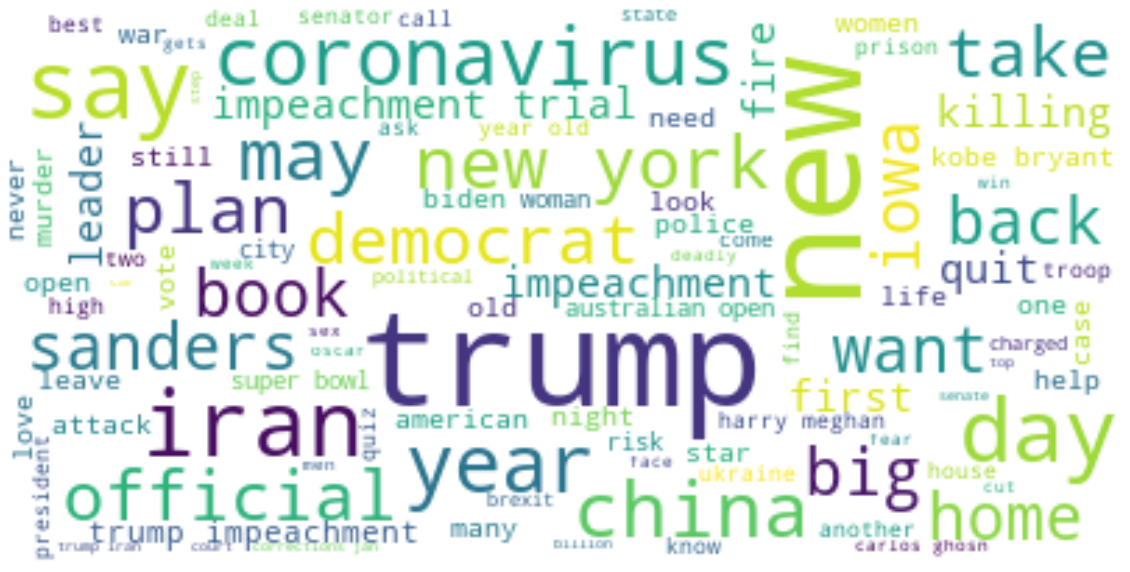

In [32]:
plt.figure(figsize=(20,20))


wc = WordCloud(max_font_size=50, max_words=100, background_color="white")
wordcloud_jan = wc.generate_from_text(' '.join(tok_jan))

plt.imshow(wordcloud_jan, interpolation="bilinear")
plt.axis("off")
plt.show()

### February

In [33]:
sentences_feb = feb_df['headline'].str.cat(sep = '')
sentences_feb = sentences_feb.lower()
tok_feb = word_tokenize(sentences_feb)
tok_feb = [char for char in tok_feb if char not in string.punctuation]


tok_feb = [token for token in tok_feb if token not in stop]
tok_feb = [word for word in tok_feb if len(word) >= 3]


In [34]:
import operator
freq_dis_feb={}
for tok in tok_feb:
    if tok in freq_dis_feb:
        freq_dis_feb[tok]+= 1
    else:
        freq_dis_feb[tok]=1
        
# We want to sort this dictionary on values ( freq in this case )

sorted_freq_feb = sorted(freq_dis_feb.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_freq_feb[:25])

[('coronavirus', 275), ('new', 262), ('trump', 203), ('u.s.', 78), ('says', 76), ('china', 75), ('day', 69), ('city', 62), ('york', 59), ('iowa', 58), ('democratic', 58), ('women', 56), ('state', 51), ('sanders', 50), ('bloomberg', 50), ('may', 48), ('2020', 46), ('democrats', 45), ('one', 43), ('debate', 43), ('south', 43), ('time', 42), ('best', 42), ('could', 42), ('super', 41)]


In [35]:
freq_feb_df = pd.DataFrame(sorted_freq_feb[:25],
                    columns=['Word', 'Frequency']).set_index('Word')

freq_feb_df.to_csv('fevereiro.csv')

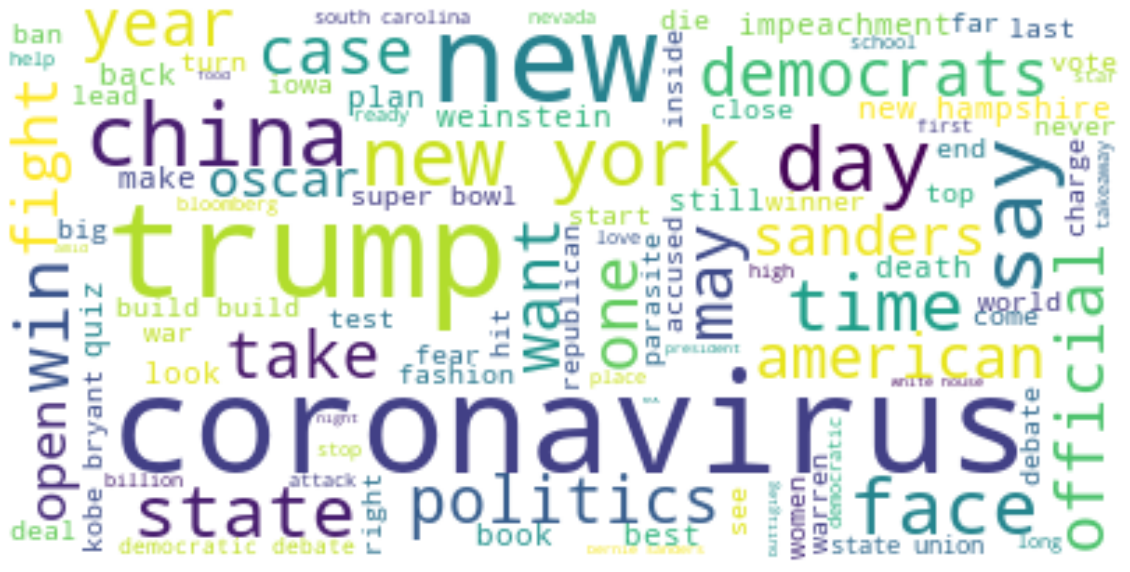

In [36]:
plt.figure(figsize=(20,20))


wc = WordCloud(max_font_size=50, max_words=100, background_color="white")
wordcloud_feb = wc.generate_from_text(' '.join(tok_feb))

plt.imshow(wordcloud_feb, interpolation="bilinear")
plt.axis("off")
plt.show()

### March

In [37]:
sentences_mar = mar_df['headline'].str.cat(sep = '')
sentences_mar = sentences_mar.lower()
tok_mar = word_tokenize(sentences_mar)
tok_mar = [char for char in tok_mar if char not in string.punctuation]


tok_mar = [token for token in tok_mar if token not in stop]
tok_mar = [word for word in tok_mar if len(word) >= 3]


import operator
freq_dis_mar={}
for tok in tok_mar:
    if tok in freq_dis_mar:
        freq_dis_mar[tok]+= 1
    else:
        freq_dis_mar[tok]=1
        
# We want to sort this dictionary on values ( freq in this case )

sorted_freq_mar = sorted(freq_dis_mar.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_freq_mar[:25])

[('coronavirus', 811), ('new', 200), ('virus', 176), ('trump', 130), ('u.s.', 117), ('home', 101), ('york', 83), ('may', 81), ('biden', 78), ('day', 76), ('sanders', 74), ('pandemic', 71), ('get', 68), ('fight', 67), ('big', 62), ('help', 61), ('stay', 61), ('amid', 57), ('says', 56), ('world', 54), ('need', 53), ('one', 52), ('health', 52), ('time', 52), ('crisis', 51)]


In [67]:
freq_mar_df = pd.DataFrame(sorted_freq_mar[:25],
                    columns=['Word', 'Frequency']).set_index('Word')

freq_mar_df.to_csv('março.csv')

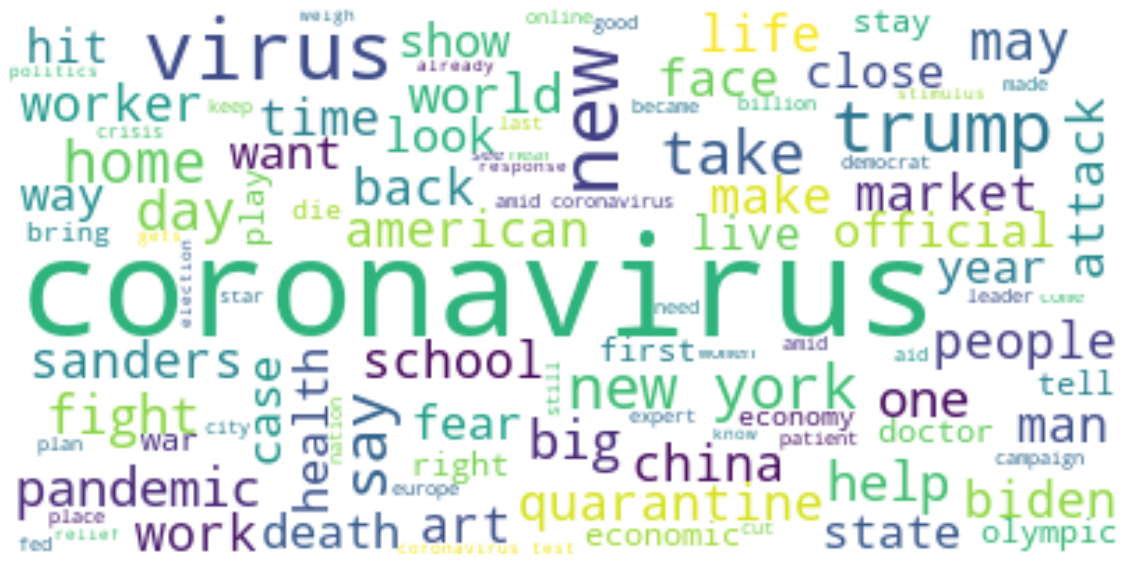

In [38]:
plt.figure(figsize=(20,20))

wordcloud_mar = wc.generate_from_text(' '.join(tok_mar))

plt.imshow(wordcloud_mar, interpolation="bilinear")
plt.axis("off")
plt.show()




### April

In [39]:
sentences_apr = apr_df['headline'].str.cat(sep = '')
sentences_apr = sentences_apr.lower()
tok_apr = word_tokenize(sentences_apr)
tok_apr = [char for char in tok_apr if char not in string.punctuation]


tok_apr = [token for token in tok_apr if token not in stop]
tok_apr = [word for word in tok_apr if len(word) >= 3]


import operator
freq_dis_apr={}
for tok in tok_apr:
    if tok in freq_dis_apr:
        freq_dis_apr[tok]+= 1
    else:
        freq_dis_apr[tok]=1
        
# We want to sort this dictionary on values ( freq in this case )

sorted_freq_apr = sorted(freq_dis_apr.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_freq_apr[:25])

[('coronavirus', 475), ('new', 230), ('virus', 176), ('trump', 145), ('pandemic', 138), ('york', 82), ('may', 78), ('day', 74), ('world', 73), ('one', 68), ('get', 68), ('back', 63), ('still', 61), ('kids', 60), ('home', 60), ('says', 57), ('help', 57), ('u.s.', 55), ('people', 54), ('fight', 54), ('make', 53), ('love', 52), ('face', 51), ('family', 50), ('like', 50)]


In [68]:
freq_apr_df = pd.DataFrame(sorted_freq_apr[:25],
                    columns=['Word', 'Frequency']).set_index('Word')

freq_apr_df.to_csv('abril.csv')

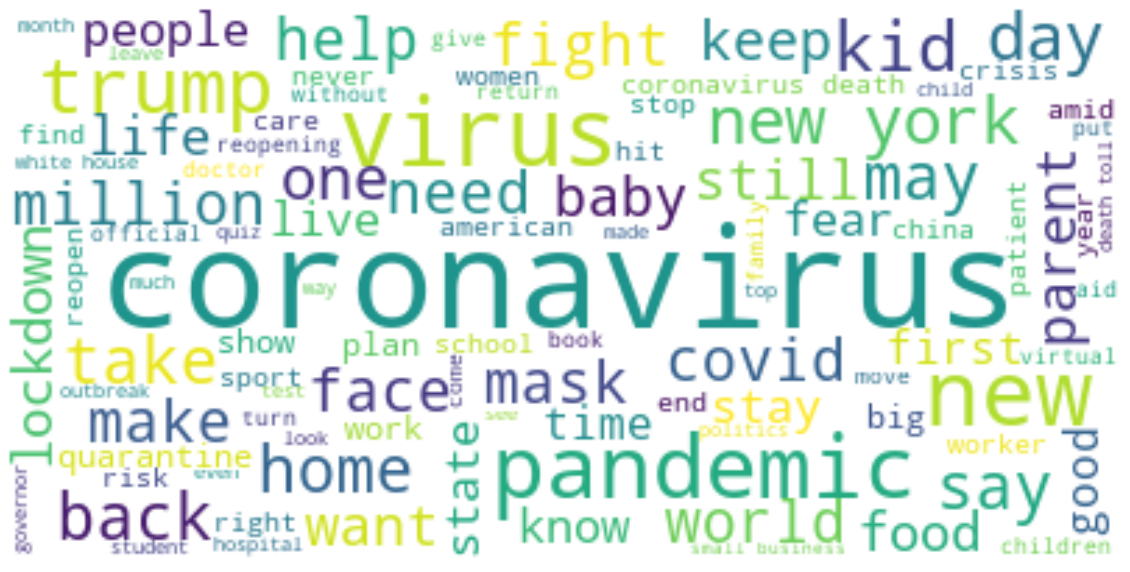

In [40]:
plt.figure(figsize=(20,20))

wordcloud_apr = wc.generate_from_text(' '.join(tok_apr))

plt.imshow(wordcloud_apr, interpolation="bilinear")
plt.axis("off")
plt.show()

### May

In [47]:
sentences_may = may_df['headline'].str.cat(sep = '')
sentences_may = sentences_may.lower()
tok_may = word_tokenize(sentences_may)
tok_may = [char for char in tok_may if char not in string.punctuation]


tok_may = [token for token in tok_may if token not in stop]
tok_may = [word for word in tok_may if len(word) >= 3]


import operator
freq_dis_may={}
for tok in tok_may:
    if tok in freq_dis_may:
        freq_dis_may[tok]+= 1
    else:
        freq_dis_may[tok]=1
        
# We want to sort this dictionary on values ( freq in this case )

sorted_freq_may = sorted(freq_dis_may.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_freq_may[:25])

[('coronavirus', 215), ('new', 214), ('pandemic', 144), ('trump', 138), ('virus', 137), ('may', 96), ('day', 82), ('back', 75), ('home', 71), ('york', 70), ('first', 63), ('court', 63), ('u.s.', 59), ('china', 56), ('get', 55), ('house', 51), ('lockdown', 48), ('says', 46), ('biden', 44), ('like', 43), ('city', 42), ('reopening', 41), ('police', 41), ('could', 40), ('million', 39)]


In [69]:
freq_may_df = pd.DataFrame(sorted_freq_may[:25],
                    columns=['Word', 'Frequency']).set_index('Word')

freq_may_df.to_csv('maio.csv')

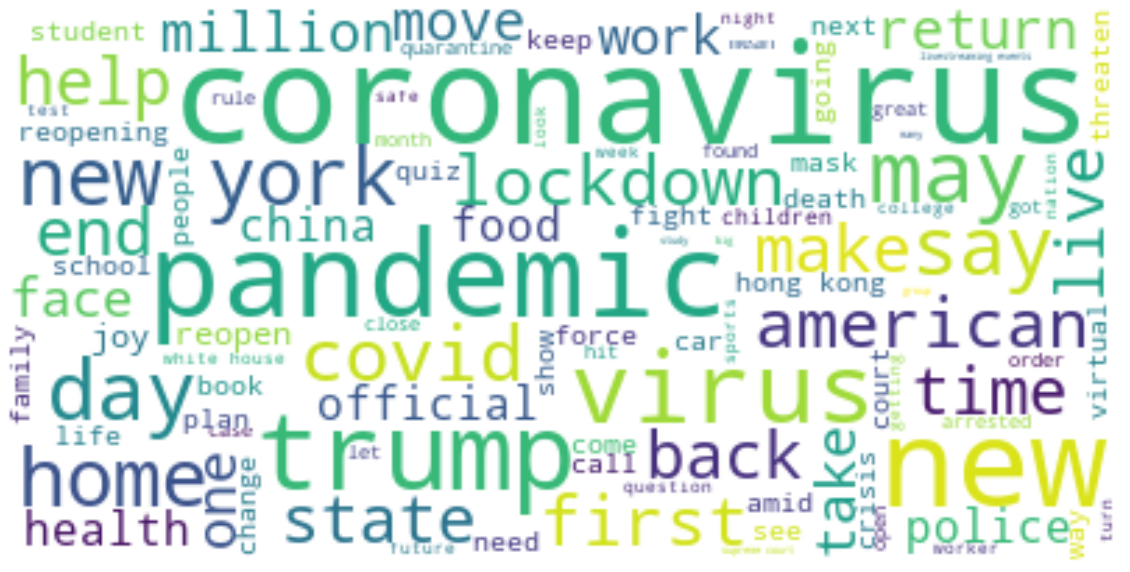

In [48]:
plt.figure(figsize=(20,20))

wordcloud_may = wc.generate_from_text(' '.join(tok_may))

plt.imshow(wordcloud_may, interpolation="bilinear")
plt.axis("off")
plt.show()

### June

In [50]:
sentences_jun = jun_df['headline'].str.cat(sep = '')
sentences_jun = sentences_jun.lower()
tok_jun = word_tokenize(sentences_jun)
tok_jun = [char for char in tok_jun if char not in string.punctuation]


tok_jun = [token for token in tok_jun if token not in stop]
tok_jun = [word for word in tok_jun if len(word) >= 3]


import operator
freq_dis_jun={}
for tok in tok_jun:
    if tok in freq_dis_jun:
        freq_dis_jun[tok]+= 1
    else:
        freq_dis_jun[tok]=1
        
# We want to sort this dictionary on values ( freq in this case )

sorted_freq_jun = sorted(freq_dis_jun.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_freq_jun[:25])

[('new', 229), ('trump', 214), ('police', 164), ('coronavirus', 148), ('black', 135), ('virus', 115), ('u.s.', 91), ('pandemic', 80), ('york', 78), ('says', 72), ('floyd', 71), ('court', 65), ('may', 63), ('back', 58), ('america', 58), ('protests', 56), ('people', 55), ('like', 53), ('world', 53), ('time', 53), ('cases', 51), ('china', 50), ('love', 50), ('george', 49), ('lives', 47)]


In [70]:
freq_jun_df = pd.DataFrame(sorted_freq_jun[:25],
                    columns=['Word', 'Frequency']).set_index('Word')

freq_jun_df.to_csv('junho.csv')

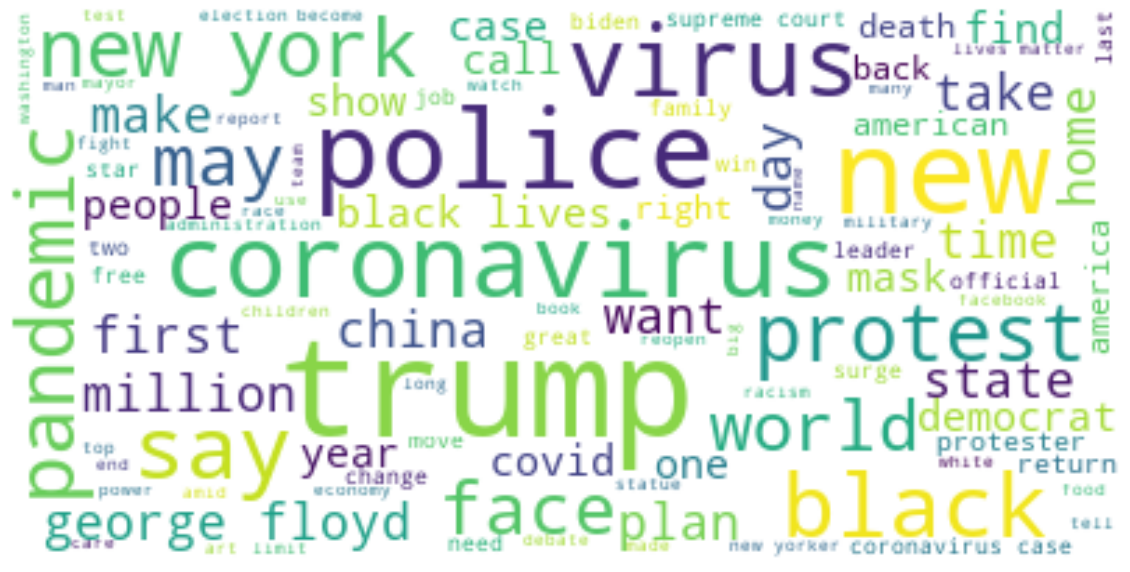

In [51]:
plt.figure(figsize=(20,20))

wordcloud_jun = wc.generate_from_text(' '.join(tok_jun))

plt.imshow(wordcloud_jun, interpolation="bilinear")
plt.axis("off")
plt.show()

### July

In [52]:
sentences_jul = jul_df['headline'].str.cat(sep = '')
sentences_jul = sentences_jul.lower()
tok_jul = word_tokenize(sentences_jul)
tok_jul = [char for char in tok_jul if char not in string.punctuation]


tok_jul = [token for token in tok_jul if token not in stop]
tok_jul = [word for word in tok_jul if len(word) >= 3]


import operator
freq_dis_jul={}
for tok in tok_jul:
    if tok in freq_dis_jul:
        freq_dis_jul[tok]+= 1
    else:
        freq_dis_jul[tok]=1
        
# We want to sort this dictionary on values ( freq in this case )

sorted_freq_jul = sorted(freq_dis_jul.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_freq_jul[:25])

[('new', 227), ('trump', 219), ('coronavirus', 181), ('virus', 145), ('pandemic', 94), ('says', 84), ('black', 80), ('may', 78), ('u.s.', 75), ('back', 68), ('york', 66), ('big', 63), ('police', 62), ('white', 62), ('first', 61), ('could', 61), ('house', 59), ('one', 59), ('court', 58), ('time', 52), ('still', 50), ('cases', 49), ('city', 47), ('covid-19', 47), ('get', 46)]


In [71]:
freq_jul_df = pd.DataFrame(sorted_freq_jul[:25],
                    columns=['Word', 'Frequency']).set_index('Word')

freq_jul_df.to_csv('julho.csv')

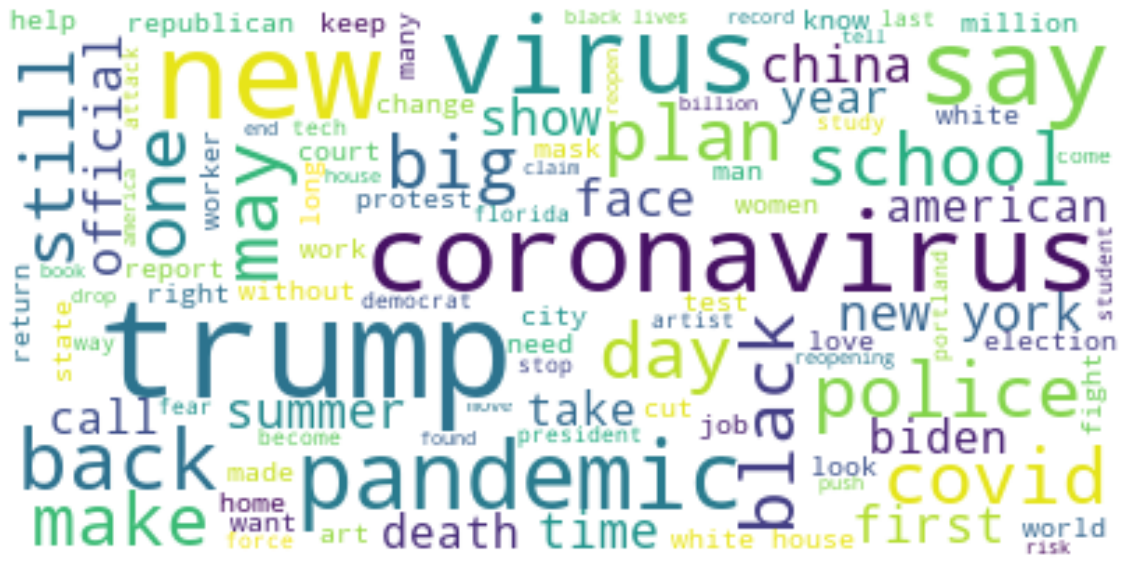

In [53]:
plt.figure(figsize=(20,20))

wordcloud_jul = wc.generate_from_text(' '.join(tok_jul))

plt.imshow(wordcloud_jul, interpolation="bilinear")
plt.axis("off")
plt.show()

### All Months

In [55]:
sentences_months = months_df['headline'].str.cat(sep = '')
sentences_months = sentences_months.lower()
tok_months = word_tokenize(sentences_months)
tok_months = [char for char in tok_months if char not in string.punctuation]


tok_months = [token for token in tok_months if token not in stop]
tok_months = [word for word in tok_months if len(word) >= 3]


import operator
freq_dis_months={}
for tok in tok_months:
    if tok in freq_dis_months:
        freq_dis_months[tok]+= 1
    else:
        freq_dis_months[tok]=1
        
# We want to sort this dictionary on values ( freq in this case )

sorted_freq_months = sorted(freq_dis_months.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_freq_months[:25])

[('coronavirus', 2182), ('new', 1622), ('trump', 1283), ('virus', 793), ('u.s.', 582), ('pandemic', 535), ('may', 527), ('york', 495), ('says', 491), ('day', 437), ('back', 379), ('get', 358), ('police', 356), ('black', 352), ('china', 349), ('home', 337), ('could', 335), ('one', 334), ('court', 333), ('first', 321), ('world', 317), ('time', 315), ('city', 303), ('million', 301), ('biden', 295)]


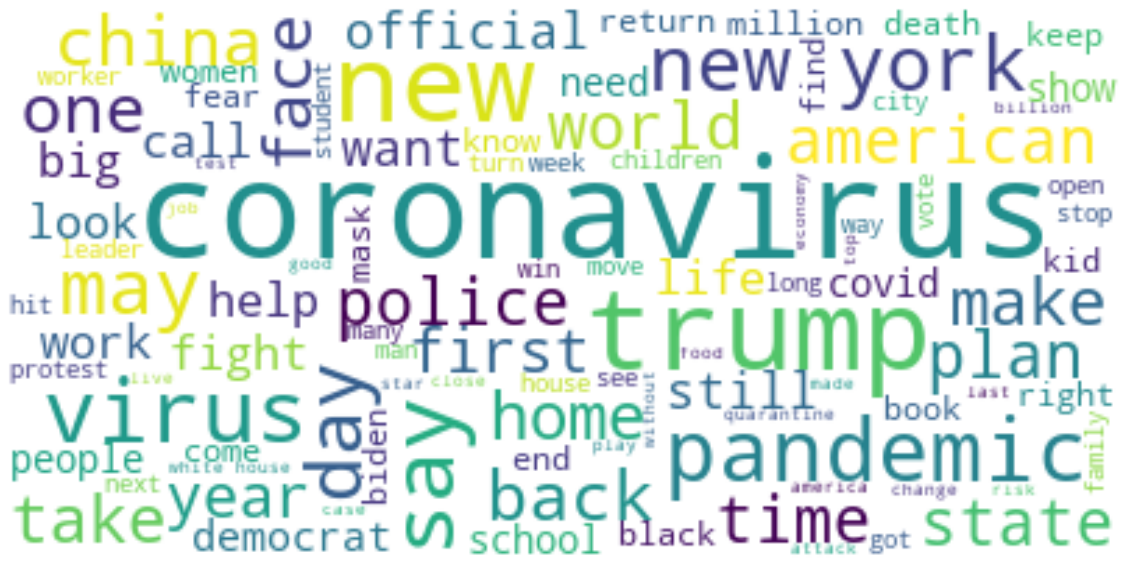

In [56]:
plt.figure(figsize=(20,20))

wordcloud_months = wc.generate_from_text(' '.join(tok_months))

plt.imshow(wordcloud_months, interpolation="bilinear")
plt.axis("off")
plt.show()

## Top 50

Hereunder, we can see the top 50 words mentioned in january 2020.

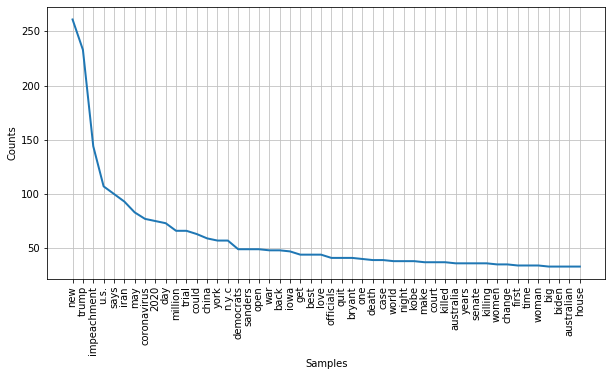

In [60]:
plt.figure(figsize=(10, 5))
Freq_dist_nltk=nltk.FreqDist(tok_jan)
Freq_dist_nltk.plot(50, cumulative=False) 

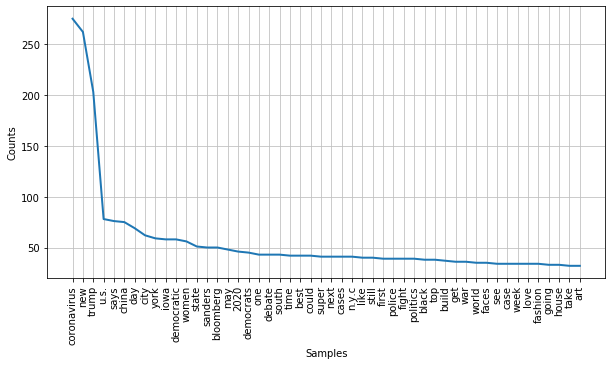

In [61]:
plt.figure(figsize=(10, 5))
Freq_dist_nltk=nltk.FreqDist(tok_feb)
Freq_dist_nltk.plot(50, cumulative=False) 

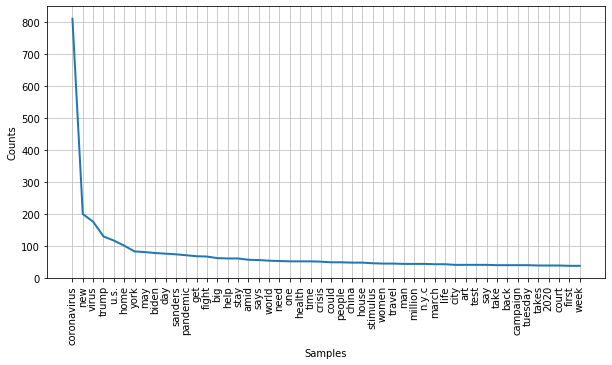

In [62]:
plt.figure(figsize=(10, 5))
Freq_dist_nltk=nltk.FreqDist(tok_mar)
Freq_dist_nltk.plot(50, cumulative=False) 

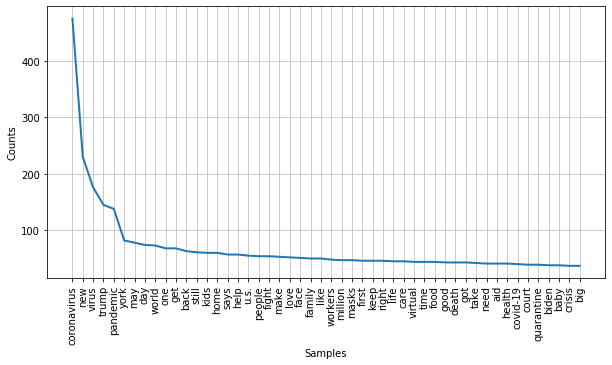

In [63]:
plt.figure(figsize=(10, 5))
Freq_dist_nltk=nltk.FreqDist(tok_apr)
Freq_dist_nltk.plot(50, cumulative=False) 

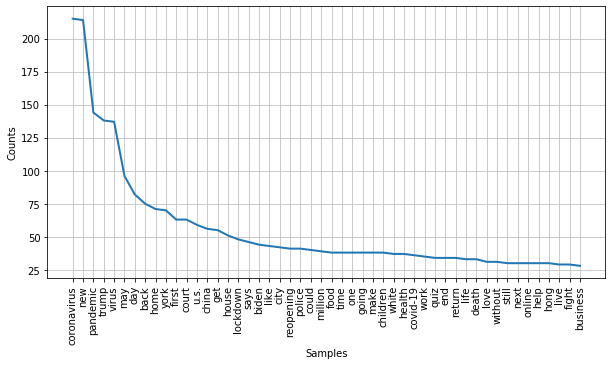

In [64]:
plt.figure(figsize=(10, 5))
Freq_dist_nltk=nltk.FreqDist(tok_may)
Freq_dist_nltk.plot(50, cumulative=False) 

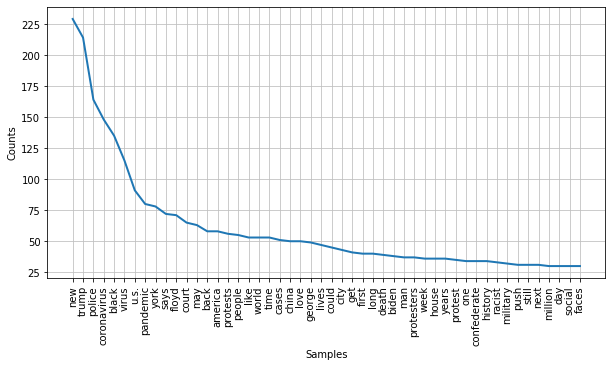

In [65]:
plt.figure(figsize=(10, 5))
Freq_dist_nltk=nltk.FreqDist(tok_jun)
Freq_dist_nltk.plot(50, cumulative=False) 

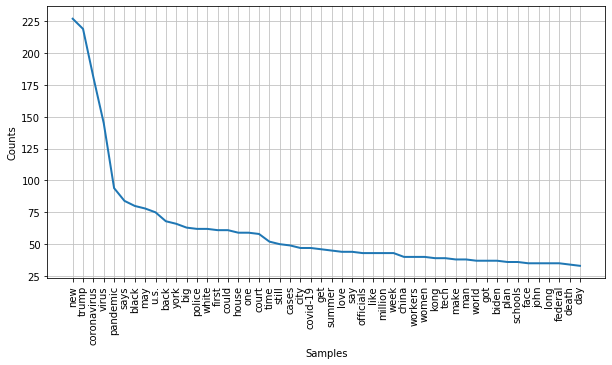

In [66]:
plt.figure(figsize=(10, 5))
Freq_dist_nltk=nltk.FreqDist(tok_jul)
Freq_dist_nltk.plot(50, cumulative=False) 